<a href="https://colab.research.google.com/github/Danilov-Aleksandr/CV_Korpus/blob/master/Linear_reg_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия с sklearn

In [ ]:
# в примере использованы синтетические данные из датасета wave
!pip install mglearn # установим библиотеку mglearn
import mglearn  

# импортируем необходимые модули
import numpy as np
import pandas as pda

# чтобы строить графики прямо в ноутбуке
import matplotlib.pyplot as plt  
%matplotlib inline

# линейные модели
from sklearn.linear_model import LinearRegression

# раздение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split

In [ ]:
# вот так выглядит наш датасет
mglearn.datasets.make_wave(n_samples=20)

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547],
        [-2.87649303],
        [ 2.81945911],
        [ 1.99465584],
        [-1.72596534],
        [-1.9090502 ],
        [-1.89957294],
        [-1.17454654],
        [ 0.14853859],
        [-0.40832989],
        [-1.25262516]]),
 array([-0.94788767,  1.01720489, -0.08596376, -0.06075119, -0.75934374,
        -1.60501542, -0.82945092,  0.68336686,  0.35889909,  0.19933869,
        -1.5774682 ,  1.11736466,  1.19312971, -1.29962216, -1.74356807,
        -0.5073919 , -0.09407231, -0.17468205, -0.29191552, -0.75878799]))

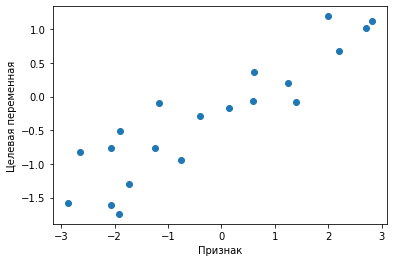

In [ ]:
# загрузим данные
X, y = mglearn.datasets.make_wave(n_samples=20)

# и визуализируем их
plt.plot(X, y, 'o')
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")
plt.show()

In [ ]:
# датасет нужно разделить на две части, чтобы учить на одной (train), а проверять на другой (test)
# разделим на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# создадим модель
lr = LinearRegression()
# и обучим ее
lr.fit(X_train, y_train)

# предскажем значения для тестовой выборки
y_pred = lr.predict(X_test)

In [ ]:
# чтобы посчитать стандартные метрики - импортируем их
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Средне-квадратичная ошибка
print("Mean squared error: {:.2f}".format(
    mean_squared_error(y_test, y_pred)))

# Средняя абсолютная ошибка
print("Mean absolute error: {:.2f}".format(
    mean_absolute_error(y_test, y_pred)))

Mean squared error: 0.11
Mean absolute error: 0.26


In [ ]:
# попробуем боевое предсказание
x_ = input('Введите Х:')
x_ = [[float(x_)]]
# print(type(x_), x_)

y_ = lr.predict(x_)

print(type(y_), y_)

print('Предсказанный у = {:0.2f}'.format(y_[0]))

Введите Х:1
<class 'numpy.ndarray'> [0.2279722]
Предсказанный у = 0.23


Уравнение прямой:  y = -0.219 + X*0.4469 




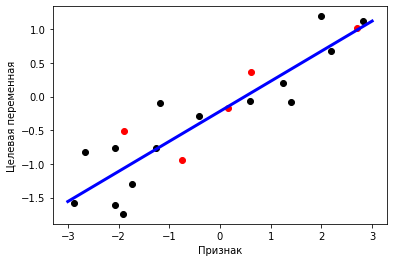

In [ ]:
# посмотрим как выглядит уравнение прямой, которой обучилась модель
print('Уравнение прямой:  y = {:.3} + X*{:.4} \n\n'.format(lr.intercept_, lr.coef_[0]))
X_line = [-3, 3]
y_line = X_line * lr.coef_ + lr.intercept_


plt.scatter(X_train, y_train,  color='black')  # черным - точки, которые видела модель
plt.scatter(X_test, y_test,  color='red')  # красным - тестовая выборка
plt.plot(X_line, y_line, color='blue', linewidth=3)  # модель - голубая линия


plt.xlabel("Признак")
plt.ylabel("Целевая переменная")
plt.show()

**The End.**

# Bonus track

In [ ]:
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
time      47 non-null object
age       45 non-null float64
sex       47 non-null object
foot      46 non-null object
head      46 non-null object
weight    47 non-null int64
growth    46 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.6+ KB


In [ ]:
data = data.dropna()
data['foot'] = data['foot'].replace('38,5', '38.5')
data[['foot', 'weight']] = data[['foot', 'weight']].astype('float64')

data.info()

X = data[['weight']]
y = data['growth']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 46
Data columns (total 7 columns):
time      45 non-null object
age       45 non-null float64
sex       45 non-null object
foot      45 non-null float64
head      45 non-null object
weight    45 non-null float64
growth    45 non-null float64
dtypes: float64(4), object(3)
memory usage: 2.8+ KB
